Ethan Fremder - Semester Project

CMSE 201 - Section 2

## Background and Motivation

As a lifelong football fan, I have always found certain football positions more fun to watch or more amusing. However, when you look at it from the general manager's point of view, who do they value the most? What positions do they value the least when thinking about their team from a financial standpoint? Another concept that I have been curious to find out is if paying more players higher level salaries results in more wins in a team's season. With that being said, the questions I will answer include:

What position(s) in football are valued the most?

What position(s) are valued the least?

If a team pays a good salary to more players, will they find more success?

## Methodology

To answer the questions, I will deem player salary as to how much a player is valued by their team. Through data visualization and analysis, the 'most valued' positions will be determined by how high player salary is and the 'least valued' positions will be determined by the smaller salaries. In order to answer the third question, I will deem a 'good salary' to be two times the league median salary. This will allow me to determine which teams qualify and relate them to how they actually performed in the season. 

The dataset that I am using is from Kaggle. It is data from 2017 of player salaries in the NFL. https://www.kaggle.com/datasets/thedevastator/nfl-player-performance-and-salary-insights-2018/

In [1]:
#this block of code imports necessary libraries
#and the project's dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

nfl = pd.read_csv("NFL 2017 Player Salaries.csv")

In [2]:
#this block of code gives a glimpse into the dataset
nfl.head()

,index,Rk,Player,Pos,Tm,Cap Hit
0,0,1.0,Kirk Cousins,QB,WAS,23943600.0
1,1,2.0,Trumaine Johnson,CB,LAR,16742400.0
2,2,3.0,Josh Norman,CB,WAS,16500000.0
3,3,NaN,Von Miller,LB,DEN,16500000.0
4,4,5.0,Justin Houston,LB,KAN,16350000.0


As shown in the first 5 rows of the data, there are a few columns of data. The colummns 'index' and 'rk' will not be used. The 'player' column is the NFL player's name (shout out to Kirk Cousins, former Michigan State quarterback from 2007-2011). The column 'Pos' labels the players with their position. Some examples include 'QB' which is the quarterback and 'CB' which is cornerback. The fifth colummn labeled 'Tm' is what team the player played for that season. Finally, the column 'Cap Hit' is the player's salary in USD.

In [3]:
#this chunk of code gets rid of the multipositional players as well as the groups with only 1 listing
mask = nfl['Pos'] != 'HB'
nfl1 = nfl[mask]

mask1 = nfl1['Pos'] != 'WR/RB'
nfl2 = nfl1[mask1]

mask2 = nfl2['Pos'] != 'DE-C'
nfl3 = nfl2[mask2]

mask3 = nfl3['Pos'] != 'WR/RB'
nfl4 = nfl3[mask3]

mask4 = nfl4['Pos'] != 'LSTE'
nfl5 = nfl4[mask4]

mask5 = nfl5['Pos'] != 'GT'
nfl6 = nfl5[mask5]

mask6 = nfl6['Pos'] != 'LB-DE'
nfl7 = nfl6[mask6]

mask7 = nfl7['Pos'] != 'NT'
nfl8 = nfl7[mask7]

pd.value_counts(nfl8['Pos'])

WR     232
CB     171
DE     156
DT     150
RB     148
TE     121
LB     119
OLB     99
DB      93
OT      89
QB      75
T       68
ILB     55
C       55
OG      50
FS      44
K       43
G       37
SS      36
S       33
P       33
OL      24
LS      20
FB      19
DL      17
Name: Pos, dtype: int64

In [4]:
NFL = nfl8

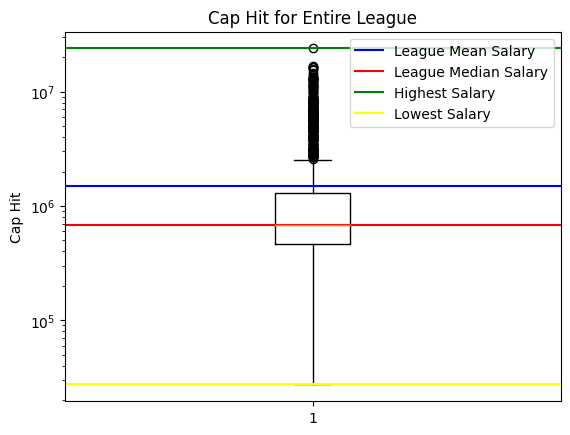

In [5]:
#this block of code gives a brief look on player salary across the league
plt.boxplot(nfl['Cap Hit'])
plt.yscale('log')
plt.title('Cap Hit for Entire League')
plt.ylabel('Cap Hit')
y = np.mean(NFL['Cap Hit'])
z = np.median(NFL['Cap Hit'])
x = np.max(NFL['Cap Hit'])
w = np.min(NFL['Cap Hit'])
plt.axhline(y, label = 'League Mean Salary', color = 'blue')
plt.axhline(z, label = 'League Median Salary', color = 'red')
plt.axhline(x, label = 'Highest Salary', color = 'green')
plt.axhline(w, label = 'Lowest Salary', color = 'yellow')
plt.legend();

This graph gives us a simple look into all of the salaries in the NFL in 2017. As we can see by this visual, most of the players are paid around 1,000,000 dollars. The median salary is under $1,000,000 whereas the average salary is above 1 million dollars. The league minimum and maximum salary are also identified.  

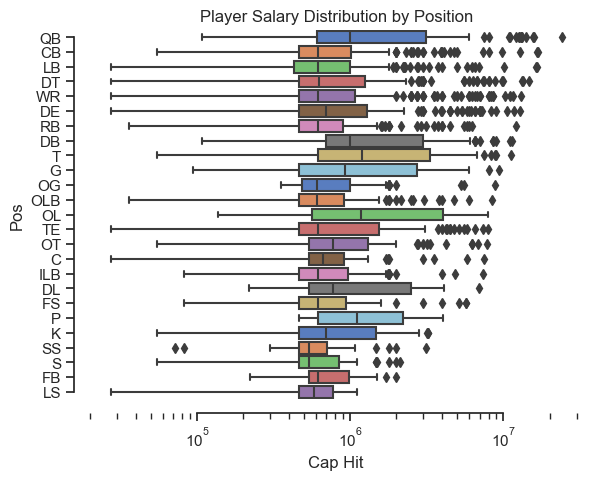

In [6]:
#this block of code creates a boxplot showing the salaries by each position
import seaborn as sns

sns.set_theme(style = 'ticks', palette = "pastel")

plot = sns.boxplot(y = 'Pos', x = 'Cap Hit', palette = "muted", data = NFL)
plot.set_xscale('log')
sns.despine(offset=10, trim=True)
plt.title('Player Salary Distribution by Position');


As shown in the plot, there is one position that clears the rest and that is quarterback. From there, it is still difficult to determine what other positions are deemed more or less valuable.

In [7]:
#this block of code creates dataframes by position
qb = NFL['Pos'] == 'QB'
qb = NFL[qb]

cb = NFL['Pos'] == 'CB'
cb = NFL[cb]

lb = NFL['Pos'] == 'LB'
lb = NFL[lb]

dt = NFL['Pos'] == 'DT'
dt = NFL[dt]

wr = NFL['Pos'] == 'WR'
wr = NFL[wr]

de = NFL['Pos'] == 'DE'
de = NFL[de]

rb = NFL['Pos'] == 'RB'
rb = NFL[rb]

db = NFL['Pos'] == 'DB'
db = NFL[db]

t = NFL['Pos'] == 'T'
t = NFL[t]

g = NFL['Pos'] == 'G'
g = NFL[g]

og = NFL['Pos'] == 'OG'
og = NFL[og]

olb = NFL['Pos'] == 'OLB'
olb = NFL[olb]

ol = NFL['Pos'] == 'OL'
ol = NFL[ol]

te = NFL['Pos'] == 'TE'
te = NFL[te]

ot = NFL['Pos'] == 'OT'
ot = NFL[ot]

c = NFL['Pos'] == 'C'
c = NFL[c]

ilb = NFL['Pos'] == 'ILB'
ilb = NFL[ilb]

dl = NFL['Pos'] == 'DL'
dl = NFL[dl]

fs = NFL['Pos'] == 'FS'
fs = NFL[fs]

p = NFL['Pos'] == 'P'
p = NFL[p]

k = NFL['Pos'] == 'K'
k = NFL[k]

ss = NFL['Pos'] == 'SS'
ss = NFL[ss]

s = NFL['Pos'] == 'S'
s = NFL[s]

fb = NFL['Pos'] == 'FB'
fb = NFL[fb]

ls = NFL['Pos'] == 'LS'
ls = NFL[ls]

By masking the data and creating new dataframes by each position, we will be able to better analyze and visualize the player salaries.

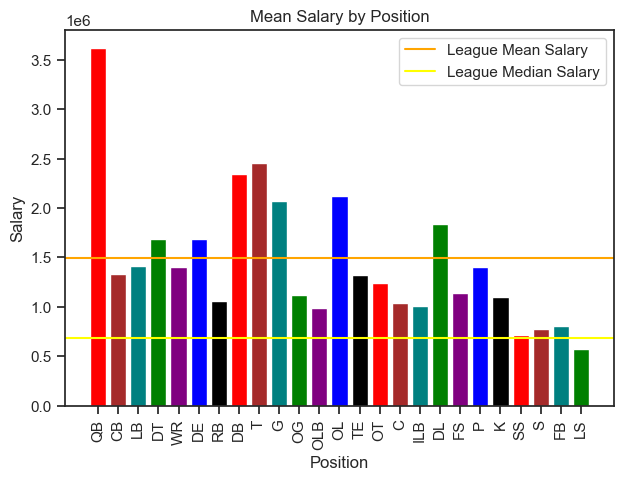

In [8]:
#this block of code creates a dataframe with the average salaries by position and plots them in a bar graph
#these lines create new values of the average salary by position
meanqb = np.mean(qb['Cap Hit'])
meancb = np.mean(cb['Cap Hit'])
meanlb = np.mean(lb['Cap Hit'])
meandt = np.mean(dt['Cap Hit'])
meanwr = np.mean(wr['Cap Hit'])
meande = np.mean(de['Cap Hit'])
meanrb = np.mean(rb['Cap Hit'])
meandb = np.mean(db['Cap Hit'])
meant = np.mean(t['Cap Hit'])
meang = np.mean(g['Cap Hit'])
meanog = np.mean(og['Cap Hit'])
meanolb = np.mean(olb['Cap Hit'])
meanol = np.mean(ol['Cap Hit'])
meante = np.mean(te['Cap Hit'])
meanot = np.mean(ot['Cap Hit'])
meanc = np.mean(c['Cap Hit'])
meanilb = np.mean(ilb['Cap Hit'])
meandl = np.mean(dl['Cap Hit'])
meanfs = np.mean(fs['Cap Hit'])
meanp = np.mean(p['Cap Hit'])
meank = np.mean(k['Cap Hit'])
meanss = np.mean(ss['Cap Hit'])
means = np.mean(s['Cap Hit'])
meanfb = np.mean(fb['Cap Hit'])
meanls = np.mean(ls['Cap Hit'])

#the next couple lines create a new dataframe with the average values
data = {'mean': [meanqb, meancb, meanlb, meandt, meanwr, meande, meanrb, meandb, meant, meang, meanog, meanolb, meanol, meante, meanot, meanc, meanilb, meandl, meanfs, meanp, meank, meanss, means, meanfb, meanls],
       'position': ['QB', 'CB', 'LB', 'DT', 'WR', 'DE', 'RB', 'DB', 'T', 'G', 'OG', 'OLB', 'OL', 'TE', 'OT', 'C', 'ILB', 'DL', 'FS', 'P', 'K', 'SS', 'S', 'FB', 'LS']}

df = pd.DataFrame(data)

#these lines create the visual below of average salaries by position
colors = ['red', 'brown', 'teal', 'green', 'purple', 'blue', 'black']
plt.bar(df['position'], df['mean'],color = colors)
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Mean Salary by Position')
plt.tight_layout()
plt.axhline(y, label = 'League Mean Salary', color = 'orange')
plt.axhline(z, label = 'League Median Salary', color = 'yellow')
plt.legend()
plt.xticks(rotation = 90);

The bar graph shows that quarterbacks are paid very highly. It also shows that positions like long snapper, fullback, and strong safety/safety have a small average salary compared to the rest of the league. 

In [9]:
#The following block of code counts the amount of players on each team whos salary is greater than double the league median
z = np.median(NFL['Cap Hit'])

med_mask = NFL['Cap Hit'] > z*2
upper50 = NFL[med_mask]

pd.value_counts(upper50['Tm'])

TEN    21
JAX    21
MIN    18
TAM    18
WAS    17
CIN    17
DEN    17
PIT    16
CHI    16
DET    16
NYG    16
OAK    16
MIA    16
ARI    16
PHI    15
LAR    15
ATL    15
LAC    15
NOR    14
NWE    14
BUF    14
BAL    13
NYJ    13
HOU    12
SFO    12
DAL    12
CAR    12
KAN    12
SEA    12
CLE    11
GNB    11
IND    10
2TM     8
Name: Tm, dtype: int64

To answer the third question, I masked the data to only include slaries two times the league median (earlier deemed as 'good salaries'). From the results above, we will take the top four and the bottom four teams and see how they performed in the 2017 season.

In [10]:
#this chunk of code creates a data frame that matches the team with the amount of wins in 2017
data = {'team': ['MIN','NE','PHI', 'PIT', 'CAR', 'LAR', 'NO', 'ATL', 'JAX', 'KC', 'BAL', 'BUF', 'DAL', 'DET', 'LAC', 'SEA', 'TEN', 'ARI', 'CIN', 'GB', 'WAS', 'LV', 'MIA', 'SF', 'CHI', 'DEN', 'NYJ', 'TB', 'HOU', 'IND', 'NYG', 'CLE'],
       'w': ['13','13','13','13','11','11','11','10','10','10','9','9','9','9','9','9','9','8','7','7','7','6','6','6','5','5','5','5','4','4','3','0']}

df = pd.DataFrame(data)


The dataframe above is each team in the NFL along with how many wins each team had

In [11]:
four = {'team': ['TEN', 'JAX', 'MIN', 'TB', 'SEA', 'CLE', 'GB', 'IND'],
       'w': [9,10,13,5,9,0,7,4]}
df = pd.DataFrame(four)

The code above creates a dataframe with just the eight teams we need to visualize

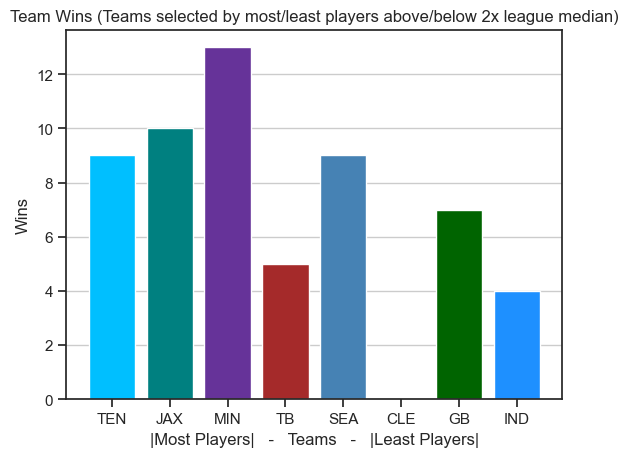

In [12]:
#the following block of code graphs the four teams with 
#the most and least players with 'good salaries'
colors = ['deepskyblue', 'teal', 'rebeccapurple', 'brown', 'steelblue', 'orange', 'darkgreen', 'dodgerblue']
plt.bar(df['team'], df['w'], color = colors)
plt.xlabel('|Most Players|   -   Teams   -   |Least Players|')
plt.ylabel('Wins')
plt.title('Team Wins (Teams selected by most/least players above/below 2x league median)');
plt.grid(axis='y')

As seen by the visual above, there is a correlation between having more players with 'good salaries' and having success in the regular season. 

## Results

After completing the analysis, it has been found that the most valued positions in football are the quarterbacks. This study has also concluded that the least valued positions are long snapper, safety, fullback and strong safety. 

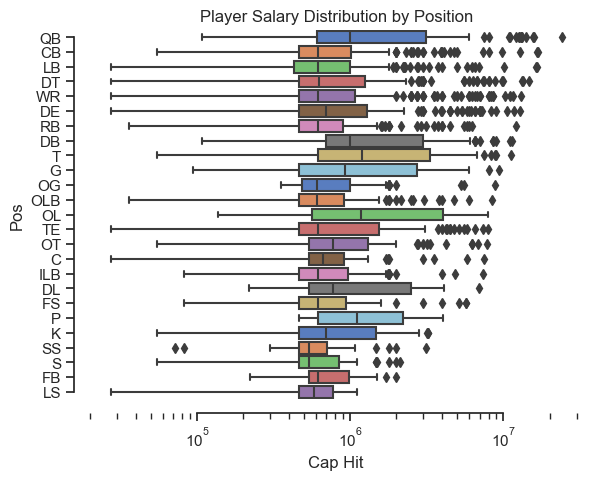

In [13]:
sns.set_theme(style = 'ticks', palette = "pastel")

plot = sns.boxplot(y = 'Pos', x = 'Cap Hit', palette = "muted", data = NFL)
plot.set_xscale('log')
sns.despine(offset=10, trim=True)
plt.title('Player Salary Distribution by Position');

From the graph above we were immediately able to pick out the quarterback as a highly paid position. After finding the four least valued positions, it is a little easier to notice the smaller salaries that they tend to get, especially the long snappers who do not have a single highly-paid outlier.

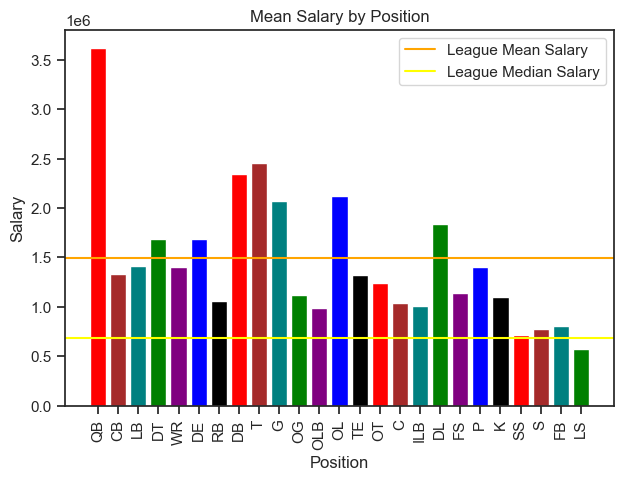

In [14]:
data = {'mean': [meanqb, meancb, meanlb, meandt, meanwr, meande, meanrb, meandb, meant, meang, meanog, meanolb, meanol, meante, meanot, meanc, meanilb, meandl, meanfs, meanp, meank, meanss, means, meanfb, meanls],
       'position': ['QB', 'CB', 'LB', 'DT', 'WR', 'DE', 'RB', 'DB', 'T', 'G', 'OG', 'OLB', 'OL', 'TE', 'OT', 'C', 'ILB', 'DL', 'FS', 'P', 'K', 'SS', 'S', 'FB', 'LS']}

df = pd.DataFrame(data)

#these lines create the visual below of average salaries by position
colors = ['red', 'brown', 'teal', 'green', 'purple', 'blue', 'black']
plt.bar(df['position'], df['mean'],color = colors)
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Mean Salary by Position')
plt.tight_layout()
plt.axhline(y, label = 'League Mean Salary', color = 'orange')
plt.axhline(z, label = 'League Median Salary', color = 'yellow')
plt.legend()
plt.xticks(rotation = 90);

To reassure the quarterback claim and to gather more claims, this barplot was very useful in determining the low end salaries as well as solidifying the quarterbacks as the lone leader.

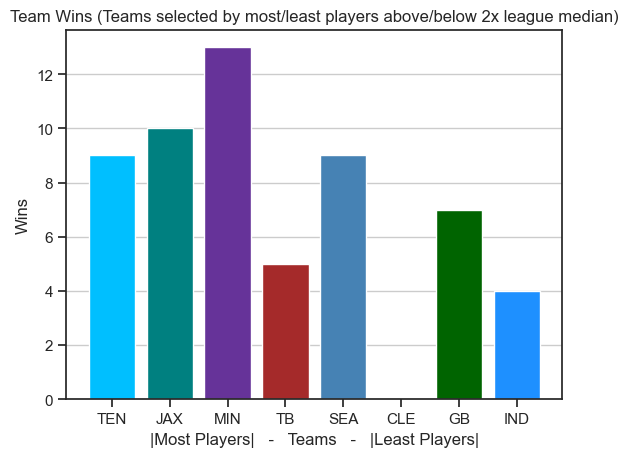

In [15]:
four = {'team': ['TEN', 'JAX', 'MIN', 'TB', 'SEA', 'CLE', 'GB', 'IND'],
       'w': [9,10,13,5,9,0,7,4]}
df = pd.DataFrame(four)

colors = ['deepskyblue', 'teal', 'rebeccapurple', 'brown', 'steelblue', 'orange', 'darkgreen', 'dodgerblue']
plt.bar(df['team'], df['w'], color = colors)
plt.xlabel('|Most Players|   -   Teams   -   |Least Players|');
plt.ylabel('Wins');
plt.title('Team Wins (Teams selected by most/least players above/below 2x league median)');
plt.grid(axis='y')

The result of the final question can be seen above. The question was 'Does paying more players good salaries result in greater team success?' The answer to the question is yes. The more players that you have under a 'good salary', the better chance you will have to get more wins in the regular season.

## Synthesis and Discussion

#### Quarterbacks are valued the most

This makes sense as quarterbacks run the offense. Every snap, they touch the ball. They are the most important position on offense as it is on them to march the ball down the field. It takes a lot of studying and a lot of physical traits to be a good quarterback. They are rare to come across.

#### The positions valued less

For the lesser paid players, the long snapper is only on the field when punting and sometimes when kicking field goals. They are not needed much out of that aspect. It is an important position but is not very physically demanding. A full back is paid more than a longsnapper but compared to other positions, they are not paid as well. This is because they rarely get in the game. When they do get in, they rarely run the ball and mainly block. These factors lead to them not getting paid as highly as most other positions. The safety and strong safety being one of the lower paid positions surprised me a little. However, they are a very replaceable position which means teams do not want to pay someone a ton of money if there is another guy very similar in talent asking for a smaller contract. This results in general managers choosing the smaller contract and someone who may not be as good to play safety so they can focus most of their money on the higher paid positions. 

#### Good salaries and team success

The result of more players with good salaries leading to greater team success does not surprise me. It is very interesting though. The teams that have more players with a good salary likely have a very balanced distribution of money which allows them to get as much talent as possible. The more talent you have, the better chance your team will have at winning football games. 

#### Obstacles

There were a few obstacles that I ran through when conducting this study. The first one was finding multiple ways to represent the data. If I were to do this again, I would likely pick another variable to include and compare salaries to. Another obstacle I encountered was not feeling 100% sure what was expected out of the project. I feel as though it is very broad and open to anything and everything which may be the case. However, numerous times I would question whether or not what I was doing would result in a 'good' project or not.

#### Final Answers

##### What position(s) in football are valued the most?
Quarterback

##### What position(s) are valued the least?
Long Snapper, Full Back, Strong Safety, and Safety

##### If a team pays a good salary to more players, will they find more success?
Yes, the more 'good salary' paid players on the team, the more success the team will have.